In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# setting style
sns.set_style("darkgrid")
# setting context
sns.set_context("paper")
# setting palette
sns.set_palette("deep", color_codes=True)


    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    Age - The age of the passenger.
    VIP - Whether the passenger has paid for special VIP service during the voyage.
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    Name - The first and last names of the passenger.
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [3]:
data = pd.read_csv(
    r"Data\train.csv")

In [4]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
data.shape

(8693, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [8]:
data.describe(include="object").round().T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


In [9]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,29.0,14.0,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,225.0,667.0,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.0,1611.0,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,174.0,605.0,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.0,1137.0,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,305.0,1146.0,0.0,0.0,0.0,46.0,24133.0


In [10]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [11]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: >

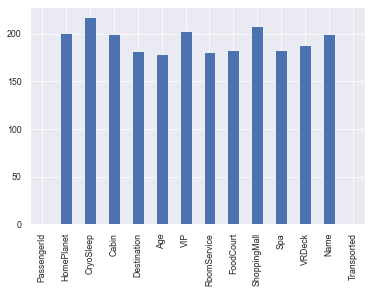

In [12]:
data.isnull().sum().plot(kind="bar")

In [13]:
np.round(data.isnull().sum() / data.shape[0], 2)

PassengerId     0.00
HomePlanet      0.02
CryoSleep       0.02
Cabin           0.02
Destination     0.02
Age             0.02
VIP             0.02
RoomService     0.02
FoodCourt       0.02
ShoppingMall    0.02
Spa             0.02
VRDeck          0.02
Name            0.02
Transported     0.00
dtype: float64

<Axes: >

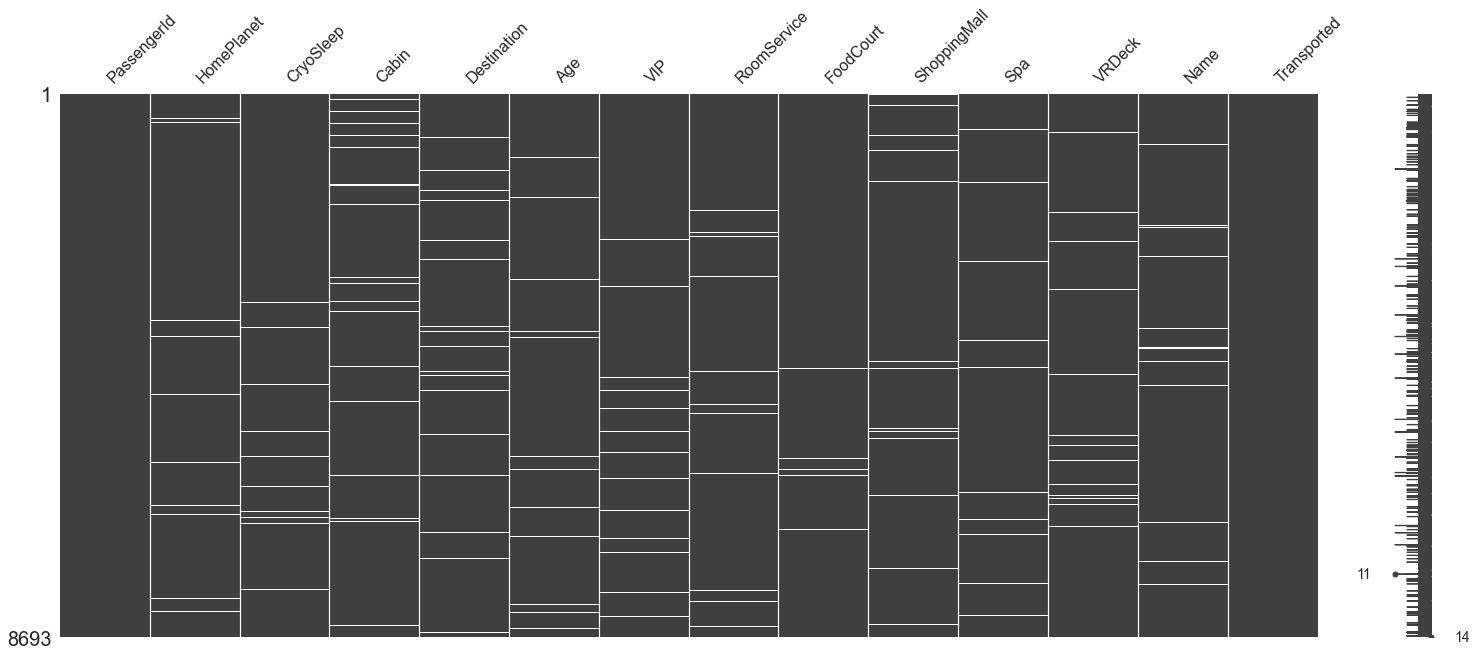

In [14]:
msno.matrix(data)

<Axes: >

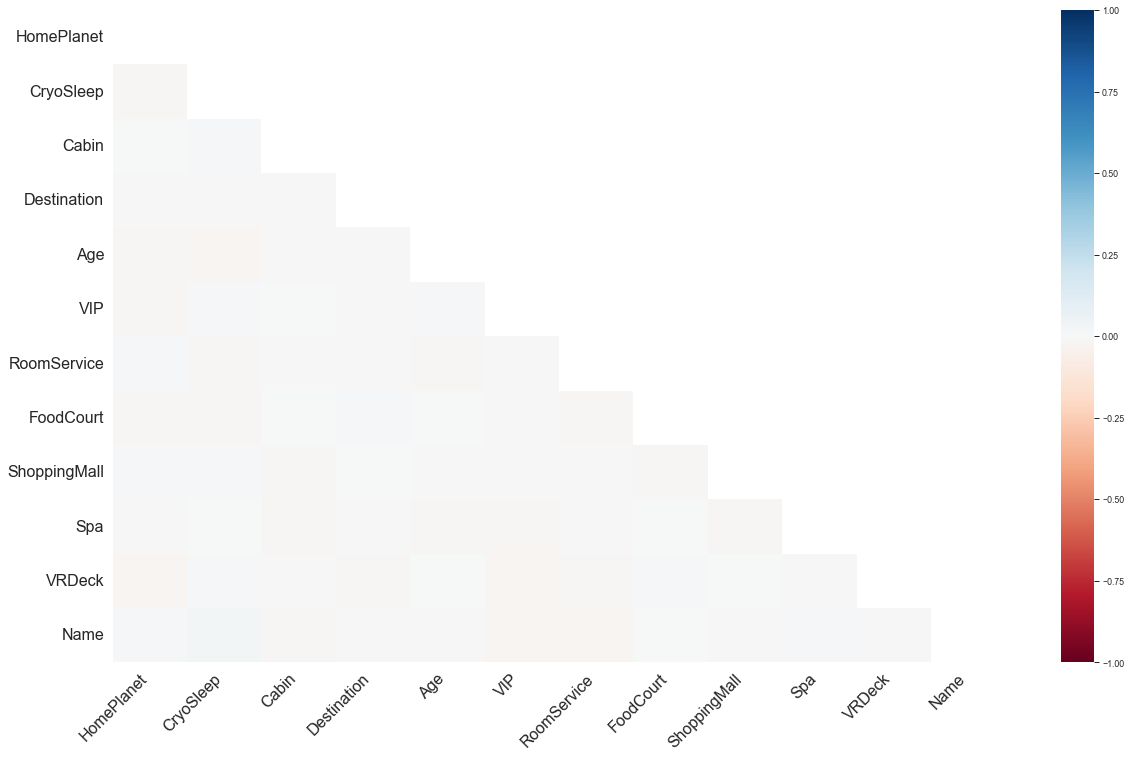

In [15]:
msno.heatmap(data)

In [16]:
data.duplicated().sum()

0

In [18]:
data["GroupID"] = data["PassengerId"].apply(
    lambda grp_id: grp_id.split("_")[0])

In [19]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


In [20]:
data["GroupID"].unique()

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [21]:
data["GroupID"].nunique()

6217

In [22]:
data["GroupID"].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: GroupID, Length: 6217, dtype: int64

In [23]:
data["GroupSizes"] = data["GroupID"].map(
    lambda size: data["GroupID"].value_counts()[size])

In [24]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSizes
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1


In [25]:
data[data["GroupID"] == "9081"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSizes
8507,9081_01,Earth,False,G/1476/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hanna Clemondsey,False,9081,8
8508,9081_02,Earth,False,F/1858/P,55 Cancri e,15.0,False,0.0,0.0,0.0,208.0,754.0,Willah Clemondsey,False,9081,8
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,9081,8
8510,9081_04,Earth,False,G/1476/P,TRAPPIST-1e,9.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9081,8
8511,9081_05,Earth,False,F/1858/P,TRAPPIST-1e,48.0,False,0.0,586.0,784.0,4.0,21.0,Haryn Clemondsey,True,9081,8
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False,9081,8
8513,9081_07,Earth,True,G/1476/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Aliey Clemondsey,True,9081,8
8514,9081_08,Earth,True,G/1476/P,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Virgie Clemondsey,True,9081,8


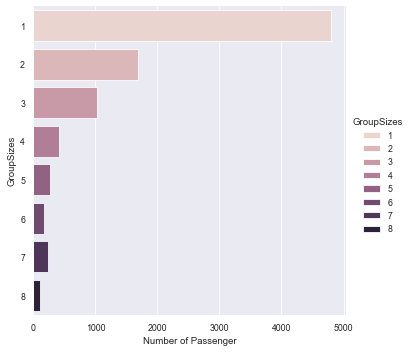

In [26]:
sns.catplot(data, y="GroupSizes", kind="count",
            hue="GroupSizes", legend="full")
plt.xlabel("Number of Passenger")
plt.show()

In [27]:
# data["CabinDeck"] = data["Cabin"].apply(
#     lambda x: x.str.split("/")[0]).astype(str)

In [28]:
data["Cabin"].str.replace("/", "")

0          B0P
1          F0S
2          A0S
3          A0S
4          F1S
         ...  
8688      A98P
8689    G1499S
8690    G1500S
8691     E608S
8692     E608S
Name: Cabin, Length: 8693, dtype: object

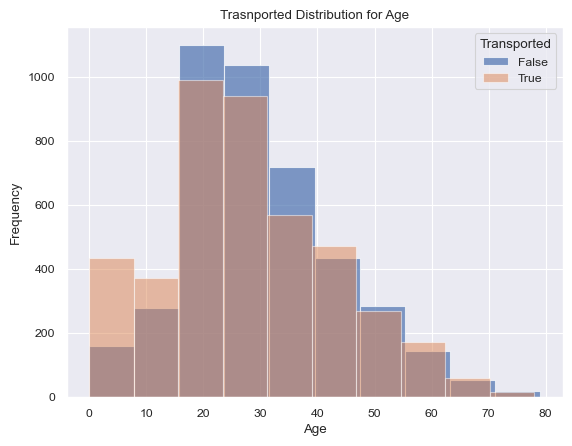

In [37]:
data[data["Transported"] == False]["Age"].plot(
    kind="hist", alpha=0.7, label="False")
data[data["Transported"] == True]["Age"].plot(
    kind="hist", alpha=0.5, label="True")
plt.legend(title="Transported")
plt.xlabel("Age")
plt.title("Trasnported Distribution for Age")
plt.show()

In [ ]:
data["Transported"].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

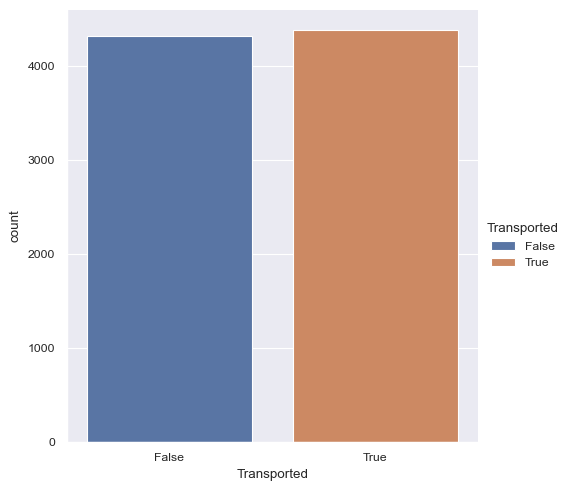

In [ ]:
sns.catplot(data=data, x="Transported", kind="count", hue="Transported")

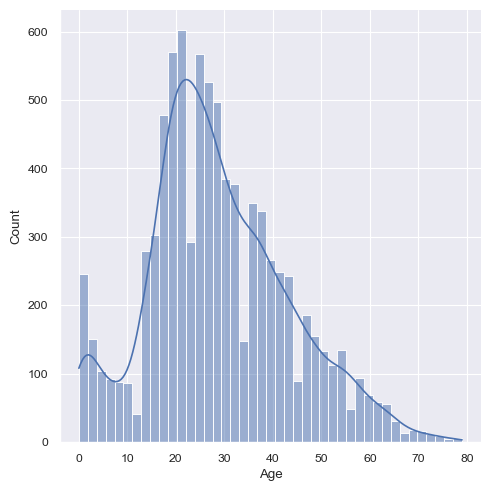

In [ ]:
sns.displot(data=data, x="Age", kind="hist", kde=True)

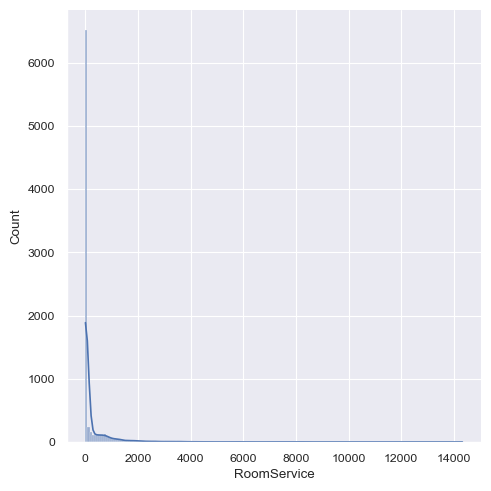

In [ ]:
sns.displot(data=data, x="RoomService", kind="hist", kde=True)

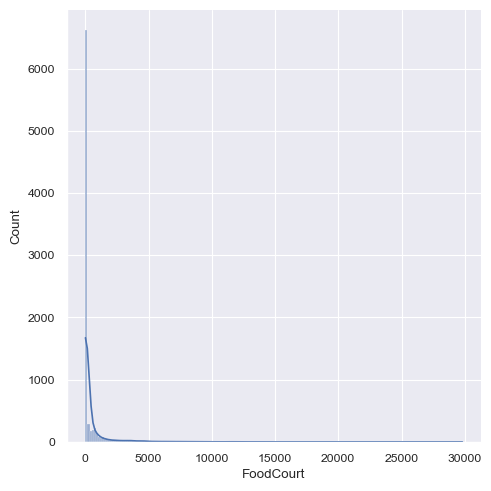

In [ ]:
sns.displot(data=data, x="FoodCourt", kind="hist", kde=True)

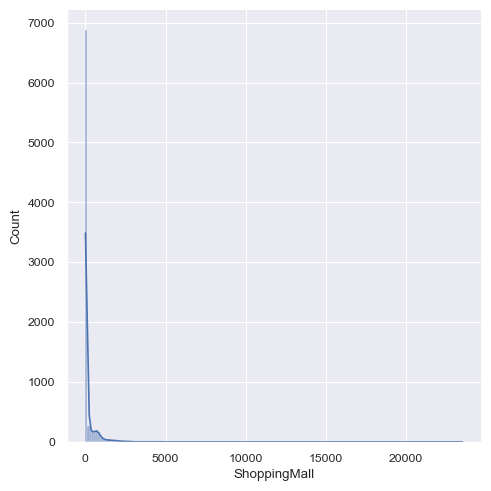

In [ ]:
sns.displot(data=data, x="ShoppingMall", kind="hist", kde=True)

FEATURE ENGINEERING

In [45]:
#Fill missing Age values with the Age median
data['Age'].fillna(value=int(data['Age'].median()),inplace=True)

#We will replace all NaNs with the label 'Missing'
data= data.fillna(value="Missing")

#Let's see how many NaN values there are now
data.isnull().sum()


PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name                0
Transported         0
GroupID             0
GroupSizes          0
TotalExpenditure    0
Deck                0
Floor               0
Side                0
dtype: int64

In [46]:
data['TotalExpenditure'] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
data.head()

C:\Users\pingj\AppData\Local\Temp\ipykernel_24052\2064130900.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['TotalExpenditure'] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSizes,TotalExpenditure,Deck,Floor,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,0.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,0.0,F,1,S


In [48]:
#New Deck, Floor, and Side feature
import math
data['Deck'] = "" #initialising feature
data['Floor'] = "" #initialising feature
data['Side'] = "" #initialising feature

deckColIndex = data.columns.get_loc('Deck')
floorColIndex = data.columns.get_loc('Floor')
sideColIndex = data.columns.get_loc('Side')
cabinColIndex = data.columns.get_loc('Cabin')

for rowNum in range(data.shape[0]):
    # print(rowNum)
    if data['Cabin'][rowNum] == "Missing":
        data.iloc[rowNum,deckColIndex] = "Missing"
        data.iloc[rowNum,floorColIndex] = "Missing"
        data.iloc[rowNum,sideColIndex] = "Missing"
    else:
        data.iloc[rowNum,deckColIndex] = data.iloc[rowNum,cabinColIndex][0]
        data.iloc[rowNum,floorColIndex] = math.ceil(int(data.iloc[rowNum,cabinColIndex].split("/")[1])/100)
        data.iloc[rowNum,sideColIndex] = data.iloc[rowNum,cabinColIndex].split("/")[2]      


In [49]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSizes,TotalExpenditure,Deck,Floor,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,0.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,0.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,0.0,A,1,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,0.0,G,15,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,0.0,G,15,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,2,0.0,E,7,S


In [50]:
#Drop Cabin feature
data = data.drop(columns=['Cabin'],axis=1)
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSizes,TotalExpenditure,Deck,Floor,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,0.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,0.0,F,1,S


In [51]:
#We will now move Deck, Floor, and Side to be before all the numerical features in the data
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
new_cols_order = ['HomePlanet','CryoSleep','Destination', 'VIP', 'Deck', 'Floor', 'Side'] + numeric_features.tolist() + ['Transported']
data = data.reindex(columns=new_cols_order)
data.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Floor,Side,Age,GroupSizes,TotalExpenditure,Transported
0,Europa,False,TRAPPIST-1e,False,B,0,P,39.0,1,0.0,False
1,Earth,False,TRAPPIST-1e,False,F,0,S,24.0,1,0.0,True
2,Europa,False,TRAPPIST-1e,True,A,0,S,58.0,2,0.0,False
3,Europa,False,TRAPPIST-1e,False,A,0,S,33.0,2,0.0,False
4,Earth,False,TRAPPIST-1e,False,F,1,S,16.0,1,0.0,True


In [52]:
#Change columns to correct dtype
for colName in data.columns:
    if colName in numeric_features:
        next
    else:
        data[colName] = data[colName].astype('category')

data.dtypes

HomePlanet          category
CryoSleep           category
Destination         category
VIP                 category
Deck                category
Floor               category
Side                category
Age                  float64
GroupSizes             int64
TotalExpenditure     float64
Transported         category
dtype: object

In [54]:
print(f"Minimum age is: {min(data.Age)}")

Minimum age is: 0.0


In [55]:
constant = 1
data['Age_Log'] = np.log(data['Age'] + constant)
from scipy import stats
data['Age_BoxCox'],BoxCox_lambda_val = stats.boxcox(data['Age'] + constant)

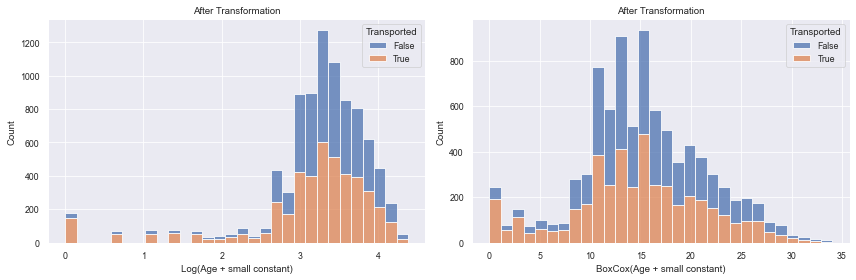

In [56]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#Plotting histogram of Age after Log transformation
sns.histplot(data=data, x='Age_Log', bins=30,ax=axs[0], hue='Transported', multiple='stack')
axs[0].set_title('After Transformation')
axs[0].set_xlabel('Log(Age + small constant)')
axs[0].set_ylabel('Count')

#Plotting histogram of Age after Box-Cox transformation
sns.histplot(data=data, x='Age_BoxCox', bins=30,ax=axs[1], hue='Transported', multiple='stack')
axs[1].set_title('After Transformation')
axs[1].set_xlabel('BoxCox(Age + small constant)')
axs[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [57]:
data['Age']=data['Age_BoxCox']
data.drop(columns=(['Age_Log','Age_BoxCox']),inplace=True)
data.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Floor,Side,Age,GroupSizes,TotalExpenditure,Transported
0,Europa,False,TRAPPIST-1e,False,B,0,P,19.742276,1,0.0,False
1,Earth,False,TRAPPIST-1e,False,F,0,S,13.497716,1,0.0,True
2,Europa,False,TRAPPIST-1e,True,A,0,S,26.848342,2,0.0,False
3,Europa,False,TRAPPIST-1e,False,A,0,S,17.330998,2,0.0,False
4,Earth,False,TRAPPIST-1e,False,F,1,S,9.782363,1,0.0,True


In [58]:
#Let's see how many unique values each column has
for i in data.columns:
  print(f'The column "{i}" has {len(data[i].value_counts())} unique values.')

The column "HomePlanet" has 4 unique values.
The column "CryoSleep" has 3 unique values.
The column "Destination" has 4 unique values.
The column "VIP" has 3 unique values.
The column "Deck" has 9 unique values.
The column "Floor" has 21 unique values.
The column "Side" has 3 unique values.
The column "Age" has 80 unique values.
The column "GroupSizes" has 8 unique values.
The column "TotalExpenditure" has 1 unique values.
The column "Transported" has 2 unique values.


In [59]:
data['Transported'] = data['Transported'].astype(int)


In [60]:
#Let's see the distribution of our Transported column
print(f"Distribution of Transported column: {data['Transported'].sum()/data.shape[0]*100:.2f}%")

Distribution of Transported column: 50.36%


In [61]:
#We need to standardize the features: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, and TotalExpenditure
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[numeric_features] = sc.fit_transform(data[numeric_features])
data.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Floor,Side,Age,GroupSizes,TotalExpenditure,Transported
0,Europa,False,TRAPPIST-1e,False,B,0,P,0.734927,-0.648735,0.0,0
1,Earth,False,TRAPPIST-1e,False,F,0,S,-0.265027,-0.648735,0.0,1
2,Europa,False,TRAPPIST-1e,True,A,0,S,1.872837,-0.022268,0.0,0
3,Europa,False,TRAPPIST-1e,False,A,0,S,0.348804,-0.022268,0.0,0
4,Earth,False,TRAPPIST-1e,False,F,1,S,-0.859975,-0.648735,0.0,1


In [63]:
# We now need to encode our categorical features: HomePlanet, CryoSleep, Destination, VIP, Deck, Floor, and Side.

categoricalFeatures = data.select_dtypes(include='category').columns
#For certain models we require drop_first=True so that we avoid the dummy variable trap
#For other models we can have drop_first=False
data_dropfirst = pd.get_dummies(data=data,columns=categoricalFeatures, drop_first=True, dtype='int')
data_nondropfirst = pd.get_dummies(data=data,columns=categoricalFeatures, drop_first=False, dtype='int')

In [64]:
#Let's move the Transported column back to the end
transportedColumn = data_dropfirst.pop('Transported')
data_dropfirst = pd.concat([data_dropfirst,transportedColumn],axis=1)
transportedColumn = data_nondropfirst.pop('Transported')
data_nondropfirst = pd.concat([data_nondropfirst,transportedColumn],axis=1)

In [65]:
#Let's create our X (independant variables) and y (dependant variable)
X_dropfirst = data_dropfirst.iloc[:,0:-1].values
y_dropfirst = data_dropfirst.iloc[:,-1].values
X_nondropfirst = data_nondropfirst.iloc[:,0:-1].values
y_nondropfirst = data_nondropfirst.iloc[:,-1].values

In [66]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into the Training set and Test set for drop_first=True
#Splitting dataset into the Training set (60%), Cross-Validation set (20%), and Test set (20%)
#1. for drop_first=True
X_train_dropfirst, X_temp, y_train_dropfirst, y_temp = train_test_split(X_dropfirst, y_dropfirst, test_size = 0.4, random_state = 0)
X_test_dropfirst, X_test_cv_dropfirst, y_test_dropfirst, y_test_cv_dropfirst = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)
#2. for drop_first=False
X_train_nondropfirst, X_temp, y_train_nondropfirst, y_temp = train_test_split(X_nondropfirst, y_nondropfirst, test_size = 0.4, random_state = 0)
X_test_nondropfirst, X_test_cv_nondropfirst, y_test_nondropfirst, y_test_cv_nondropfirst = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)

MODEL TARAINING

In [ ]:
#Import libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,make_scorer
#Define F1 score as the scoring metric
f1_scorer = make_scorer(f1_score)
# import optuna
# import warnings

# from sklearn.linear_model import LogisticRegression


In [68]:
from xgboost import XGBClassifier

#Build optimal Decision Tree XGBoost Model
xgbFinal = XGBClassifier(colsample_bylevel= 0.5, colsample_bynode= 1, colsample_bytree= 0.75, learning_rate= 0.5, max_depth= 8, min_split_loss= 0, reg_alpha= 10, reg_lambda= 50, subsample= 1)
xgbFinal.fit(X_train_nondropfirst,y_train_nondropfirst);
y_pred_cv = xgbFinal.predict(X_test_cv_nondropfirst)

In [69]:
#Displaying model's performance on Train and Validation set
print("Decision Tree (XGBoost) Model's performance on Train, and Validation set:")
print("The model's accuracy on the training set is: " + str(xgbFinal.score(X_train_nondropfirst,y_train_nondropfirst)*100)+ "%")
print("The model's accuracy on the validation set is: " + str(accuracy_score(y_test_cv_nondropfirst,y_pred_cv)*100)+ "%")
print("The model's precision on the validation set is: " + str(precision_score(y_test_cv_nondropfirst,y_pred_cv)*100)+ "%")
print("The model's recall on the validation set is: " + str(recall_score(y_test_cv_nondropfirst,y_pred_cv)*100)+ "%")
print("The model's f1_score on the validation set is: " + str(f1_score(y_test_cv_nondropfirst,y_pred_cv)))

Decision Tree (XGBoost) Model's performance on Train, and Validation set:
The model's accuracy on the training set is: 76.91275167785236%
The model's accuracy on the validation set is: 74.23806785508913%
The model's precision on the validation set is: 79.6271637816245%
The model's recall on the validation set is: 66.96528555431132%
The model's f1_score on the validation set is: 0.7274939172749392


In [70]:
y_pred_test = xgbFinal.predict(X_test_nondropfirst)
print("Decision Tree (XGBoost) performance on Test set:")
print("The model's accuracy on the test set is: " + str(accuracy_score(y_test_nondropfirst,y_pred_test)*100)+ "%")

Decision Tree (XGBoost) performance on Test set:
The model's accuracy on the test set is: 75.84818861414607%
